## Buscar otro tutorial de Python y hacer ejercicios usando numpy y funciones. Hacer un notebook. Resaltar las diferencias entre tipos de variables, listas y arreglos, etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
### Graficando la funcion $y=x^2$

In [2]:
# Se crean las variables x en el rango (-5,5) y $y=x^2$

x=np.linspace(-5,5,30)
x2=np.arange(-5,5,0.2)
y=x**2
y2=x2**3


Text(0,0.5,'Eje Y')

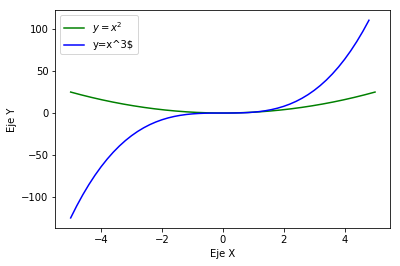

In [3]:
# Graficar las funciones creadas e indicar nombres a los ejes, etiqueta y cambiarla de color

plt.plot(x,y, 'green', label="$y=x^2$")
plt.plot(x2,y2, 'blue', label="y=x^3$")
plt.legend()
plt.xlabel("Eje X")
plt.ylabel("Eje Y")

Text(0,0.5,'Eje Y')

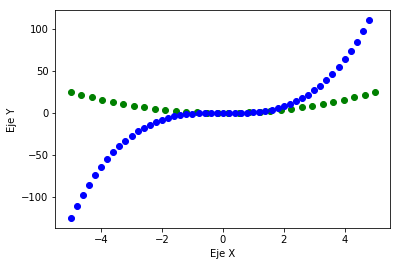

In [4]:
# Aqui s grafican las mismas funciones pero con otro estilo de punto

plt.plot(x,y, 'or', color = 'green', label="$y=x^2$")
plt.plot(x2,y2, 'or', color = 'blue', label="y=x^3$")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")

In [5]:
### Esta parte crea una grafica para obtener la temperatura reducida 𝑇∗ como una funcion de 𝜆 para D = 1 a 5. Se incluye una funcion para integrar numericamente Este es un ejercicio que hice en la clase de simulacion molecular.

In [6]:
dx = 0.00001 

def integra(expresion):
    u = 0
    for j in range(1, len(expresion)-1):
        are = (expresion[j] + expresion[j+1])/2 * dx
        u += are
    return u + 2 * (expresion[1])/2 * dx

def area(t, lamb, d):
    x = np.longdouble(np.arange(0.000001, lamb / (lamb - 1), dx)) #np.float128
    tred = t
    a = lamb * np.power(lamb / (lamb - 1), lamb - 1)
    b = lamb / (lamb - 1)
    expon = np.exp(-(1/tred) * (a * (np.power((1/x), lamb) - np.power((1/x), (lamb - 1))) + 1))
    expresion = np.power(x, d - 1) * (expon - 1)
    return integra(expresion) * d + 1

def raiz(t, des, lamb, d):
    while np.absolute(area(t, lamb, d)) > 0.00000001:
        a2 = area(t, lamb, d)
        a1 = area(t+des, lamb, d)
        m = (a2 - a1) / (-des)
        b = a2 - m * t
        t = -b / m   
    return t
 
def tred(d):
    f = []
    for lamb in range(10, 1000, 10):
        t = 1.46
        f.append(raiz(t, 0.00001, lamb, d))
    return f

In [7]:
f1 = tred(1)
xx = np.arange(10, 1000, 10)

/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


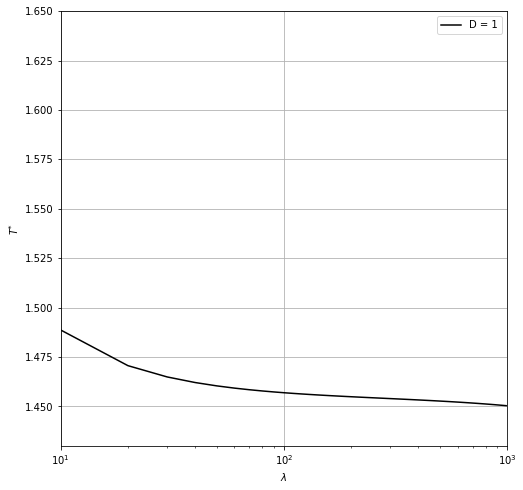

In [9]:
plt.rcParams["figure.figsize"] = (8,8)
plt.xlim(10, 1000)
plt.ylim(1.43, 1.65)
plt.xlabel("$\lambda$")
plt.ylabel("$T^{*}$")
plt.semilogx(xx, f1, "-", color = 'k', label = "D = 1")
plt.grid(b=None, which='major', axis='both')
plt.legend()

In [ ]:
### Manejo de arreglos con el paquete numpy

Para crear un array la forma mas directa es pasarle una secuencia a la funcion np.array. Ejemplo:

In [10]:
np.array([1, 2, 3, 23, 235, 23, 4])

array([  1,   2,   3,  23, 235,  23,   4])

#### Notas:

1.-Utilizar arreglos es mas eficiente que utilizar bucles. 2.-Eliminar bucles y usar arreglos significa vectorizar operaciones. 3.-Los bucles se ejecutan en Python, las operaciones vectorizadas en C. 4.-Las operaciones entre arrays de numpy se realizan elemento a elemento.

In [11]:
N, M = 100,100
a = np.empty(10000).reshape(N,M)
b = np.random.rand(10000).reshape(N, M)
c = np.random.rand(10000).reshape(N, M)

In [12]:
%%timeit
for i in range(N):
    for j in range(M):
        a[i, j] = b[i, j] + c[i, j]

6.9 ms ± 971 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
a = b + c

9.02 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Como podemos ver, para este ejemplo la diferencia de tiempo entre usar un bucle y una suma vectorizada es de un orden 1000 veces menor. Numpy tiene estructuras muy optimizadas para realizar las mismas operaciones en un menor tiempo que python.

In [ ]:
### Ejemplo del uso de la funcion lambda para declarar funciones

In [14]:
sigm  = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x * (1-x))  

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5,5,100)

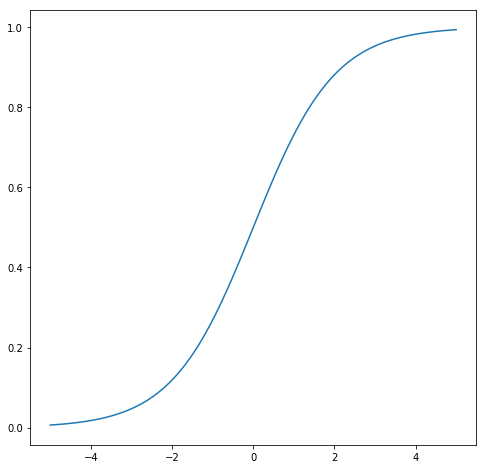

In [15]:
# Funcion Sigmoide
plt.plot(_x, sigm[0](_x))

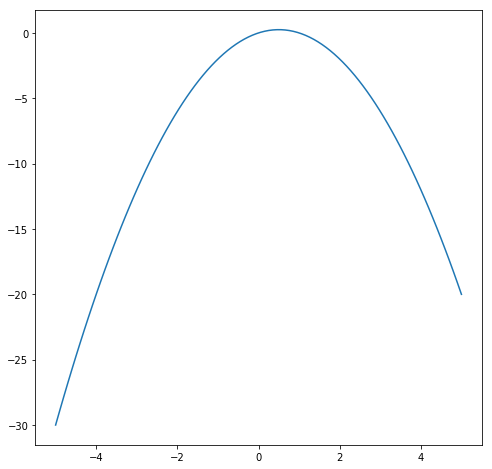

In [16]:
# Derivada de la Sigmoide
plt.plot(_x, sigm[1](_x))

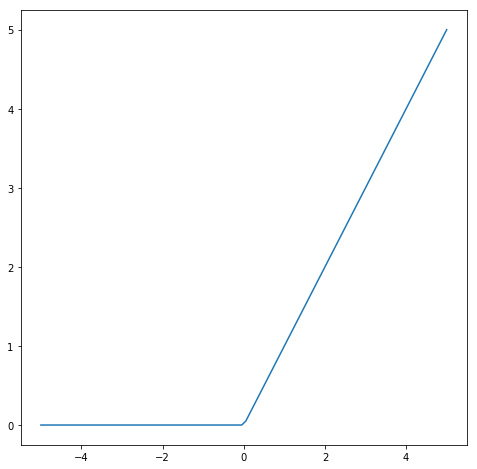

In [17]:
# Funcion Relu
plt.plot(_x, relu(_x))